# Cluster Identification and Local/Neighborhood Structure Preservation 
We need to identify cell type clusters in each dataset and analyze their dynamics across multiple DRs.

In [1]:
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


In [ ]:
# reload functions when editing file
del sys.modules['fcc_DRs']
from fcc_DRs import *

---
To benchmark dimensionality reduction techniques, we are using two datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be highly __discrete__, containing highly separable cell populations, where the latter should be __continuous__, representing a continuum of branching cell states in the gut epithelium.

---
### Retina

In [2]:
retina = RNA_counts.from_file('inputs/GSM1626793_P14Retina_1.processed.tsv')

In [3]:
retina_PCA100 = fcc_PCA(retina.arcsinh_norm(), n_components=100)
retina_tSNE = fcc_tSNE(retina_PCA100.results, perplexity=30, seed=18)

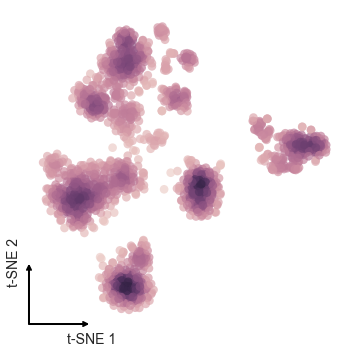

In [4]:
retina_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11027e518>)

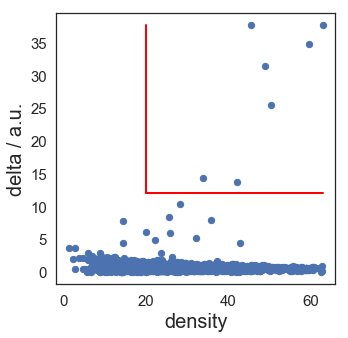

In [5]:
# assign cluster center cutoffs and show decision graph again
retina_tSNE.clu.assign(20,12)
retina_tSNE.clu.draw_decision_graph(min_delta=retina_tSNE.clu.min_delta, 
                                    min_density=retina_tSNE.clu.min_density)

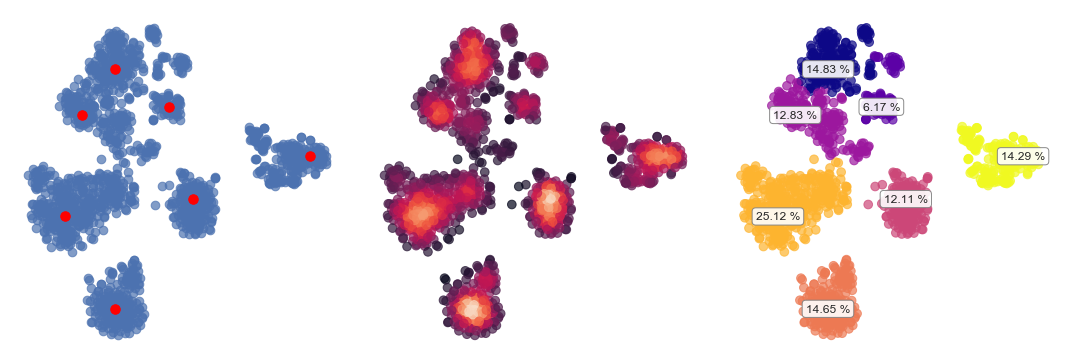

In [6]:
retina_tSNE.plot_clusters()

In [7]:
retina_tSNE.cluster_counts()

245 cells in cluster 0 (14.831 %)

102 cells in cluster 1 (6.174 %)

212 cells in cluster 2 (12.833 %)

200 cells in cluster 3 (12.107 %)

242 cells in cluster 4 (14.649 %)

415 cells in cluster 5 (25.121 %)

236 cells in cluster 6 (14.286 %)



In [8]:
retina_tSNE.plot(save_to='images/retina_clu.png', figsize=(6,6))

In [9]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Opn1mw$')].flatten(), save_to='images/retina_clu_Opn1mw.png', figsize=(6,6))

In [10]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rlbp1$')].flatten(), save_to='images/retina_clu_Rlbp1.png', figsize=(6,6))

In [11]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Vsx2$')].flatten(), save_to='images/retina_clu_Vsx2.png', figsize=(6,6))

In [12]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Pax6$')].flatten(), save_to='images/retina_clu_Pax6.png', figsize=(6,6))

In [13]:
np.savetxt(X=retina_tSNE.results, fname='dev/pymethods_out/retina_clu_tSNE.csv', delimiter=',')

In [14]:
np.savetxt(X=retina_tSNE.clu.membership, fname='inputs/retina_clu.csv', delimiter=',')

---
### Colon

In [19]:
colon = RNA_counts.from_file('inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv')

In [36]:
colon_PCA100 = fcc_PCA(colon.arcsinh_norm(), n_components=100)
colon_tSNE = fcc_tSNE(colon_PCA100.results, perplexity=30, seed=1)

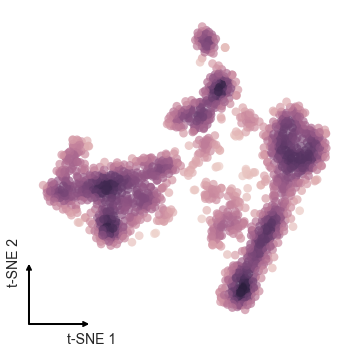

In [37]:
colon_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1324edf60>)

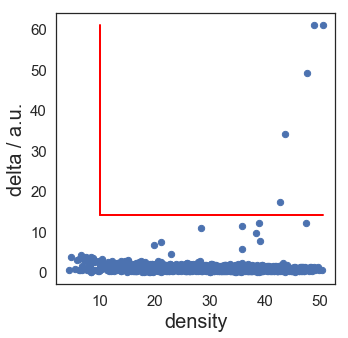

In [38]:
# assign cluster center cutoffs and show decision graph again
colon_tSNE.clu.assign(10,14)
colon_tSNE.clu.draw_decision_graph(min_delta=colon_tSNE.clu.min_delta, 
                                   min_density=colon_tSNE.clu.min_density)

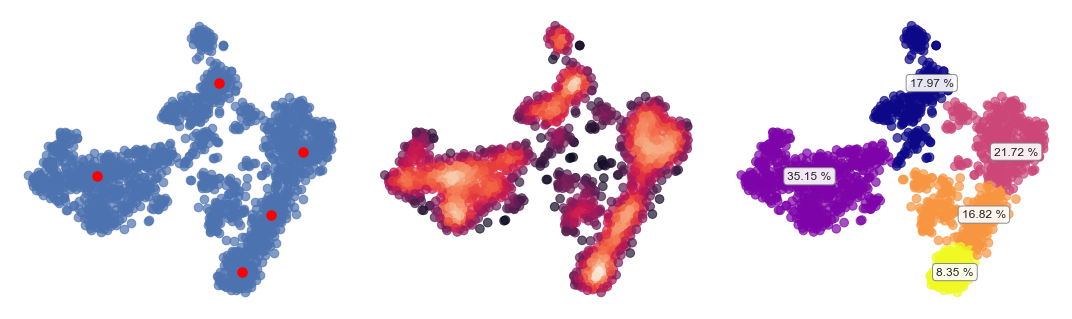

In [39]:
colon_tSNE.plot_clusters()

In [40]:
colon_tSNE.cluster_counts()

297 cells in cluster 0 (17.967 %)

581 cells in cluster 1 (35.148 %)

359 cells in cluster 2 (21.718 %)

278 cells in cluster 3 (16.818 %)

138 cells in cluster 4 (8.348 %)



In [41]:
colon_tSNE.plot(save_to='images/colon_clu.png', figsize=(6,6))

In [42]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc2'].flatten(), save_to='images/colon_clu_Muc2.png', figsize=(6,6))

In [43]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Krt20'].flatten(), save_to='images/colon_clu_Krt20.png', figsize=(6,6))

In [44]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Reg4'].flatten(), save_to='images/colon_clu_Reg4.png', figsize=(6,6))

In [45]:
np.savetxt(X=colon_tSNE.results, fname='dev/pymethods_out/colon_clu_tSNE.csv', delimiter=',')

In [46]:
np.savetxt(X=colon_tSNE.clu.membership, fname='inputs/colon_clu.csv', delimiter=',')

---
### Test results as barcodes

In [15]:
# grab retina tSNE and merge previously-defined retina clustering as 'barcodes' for further analysis
retina_tSNE_test = DR.from_file(datafile='dev/pymethods_out/retina_clu_tSNE.csv', labels=[None,None], barcodefile='inputs/retina_clu.csv', name='t-SNE')

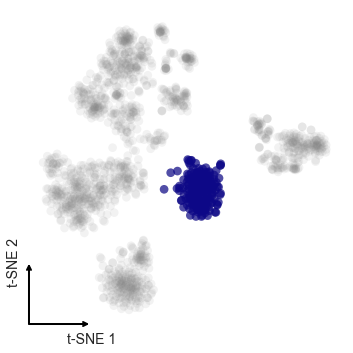

In [18]:
retina_tSNE_test.plot_barcodes(ranks=['3'])

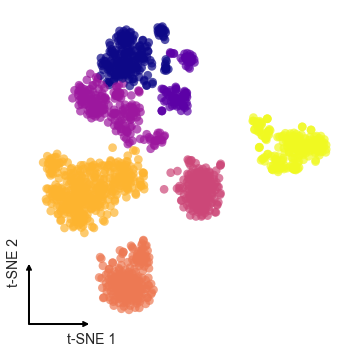

In [17]:
retina_tSNE_test.plot_barcodes()

In [62]:
retina_tSNE_test.plot(color=retina.arcsinh_norm().sum(axis=1), save_to='images/retina_clu_UMI.png', figsize=(6,6))

---

In [47]:
# grab retina tSNE and merge previously-defined retina clustering as 'barcodes' for further analysis
colon_tSNE_test = DR.from_file(datafile='dev/pymethods_out/colon_clu_tSNE.csv', labels=[None,None], barcodefile='inputs/colon_clu.csv', name='t-SNE')

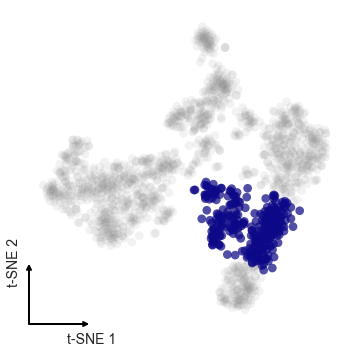

In [50]:
colon_tSNE_test.plot_barcodes(ranks=['3'])

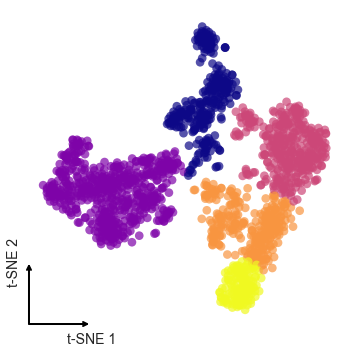

In [49]:
colon_tSNE_test.plot_barcodes()

In [60]:
colon_tSNE_test.plot(color=colon.arcsinh_norm().sum(axis=1), save_to='images/colon_clu_UMI.png', figsize=(6,6))